In [22]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import lfilter, firwin
from scipy.fftpack import fft,fftshift
from scipy import signal
from tool._fixedInt import *
from random import *


# <u> Analisis de filtro y generación de banco de pruebas </u>

## Respuesta en frecuencia
Primero se obtiene la respuesta en frecuencia del filtro para poder testear su funcionamiento correctamente.


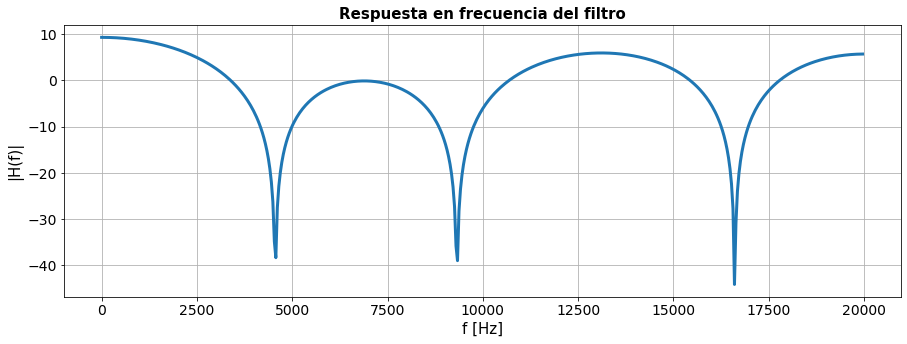

In [38]:
J   = 4         # Unfolding factor
fs = J*10000    # 40kHz
b_aux=[0.0, 229.0, 0.0, 81.0, 127.0, 81.0, 0.0, 229.0]
b = [x / 2**8 for x in b_aux]
w, h = signal.freqz(b=b, a=1)
x = w*fs*1/(2*np.pi)
y = 20*np.log10(abs(h))

plt.figure(figsize=(15,5))
plt.plot(x,y, linewidth=3)
plt.title("Respuesta en frecuencia del filtro", fontweight="bold", fontsize=15)
plt.xlabel("f [Hz]", fontsize=15)
plt.ylabel("|H(f)|", fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)

## Generación de señal de entrada
Ahora, se genera una señal de entrada sinusoidal compuesta de dos componentes, una que debe pasar, y otra que debe verse fuertemente atenuada debido a la respuesta del filtro

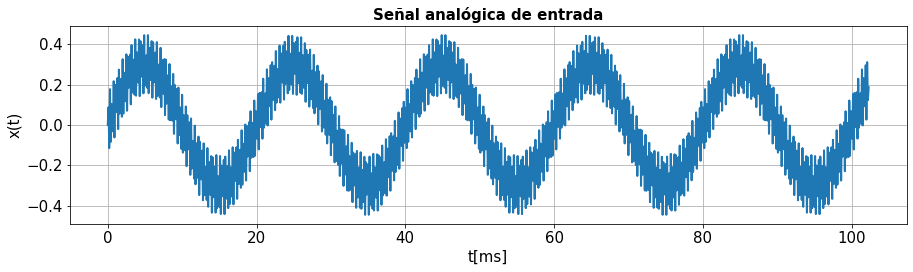

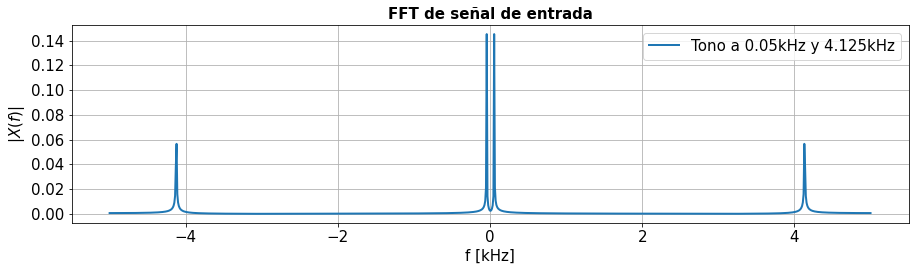

In [45]:
f1      = 50                        # 300Hz
f2      = 4125                      # 1.1kHz
N       = 1024                      # 1024 muestras
f_samp  = fs/J                      # frequency/unfolding = 40kHz/4 = 10kHz
Ts = 1/f_samp                       # Sampling period
NFFT = 1024                         # Beams fft
t = np.arange(N)*Ts                 # Sampling time
f = np.linspace(-f_samp/2, f_samp/2, NFFT)  # Frequency vector
n = np.arange(0,len(t))             # Samples vecor

x = 0.3*np.sin(2*np.pi*f1*t) + 0.15*np.sin(2*np.pi*f2*t)    # Signal + noise
X = fft(x, NFFT)                                            # fft
X = fftshift(X)

plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
plt.plot(t/1e-3,x, linewidth=2)
plt.title("Señal analógica de entrada", fontsize=15, fontweight="bold")
plt.xlabel("t[ms]", fontsize=15)
plt.ylabel("x(t)", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)

plt.figure(figsize=(15,8))
plt.subplot(2,1,2)
plt.plot(f/1e3,1/NFFT*np.abs(X), linewidth=2, label=f"Tono a {f1/1e3}kHz y {f2/1e3}kHz")
plt.title("FFT de señal de entrada", fontsize=15, fontweight="bold")
plt.xlabel("f [kHz]", fontsize=15)
plt.ylabel("$|X(f)|$", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='best', fontsize=15)
plt.grid(True)

# Cuantización
NB_DATA  = 8
NBF_DATA = 7
xn = arrayFixedInt(NB_DATA, NBF_DATA, x)

input_sig = open("input.mem","w")
for i in xn:
    input_sig.write(f"0x{i.__hex__()}\n")
input_sig.close()

## <u> Filtrado de señal </u>

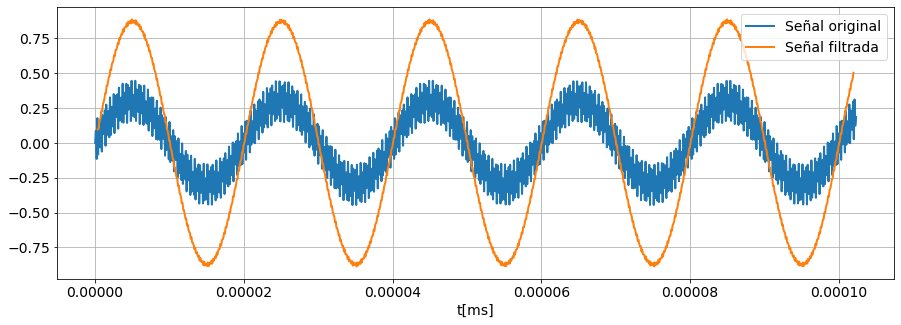

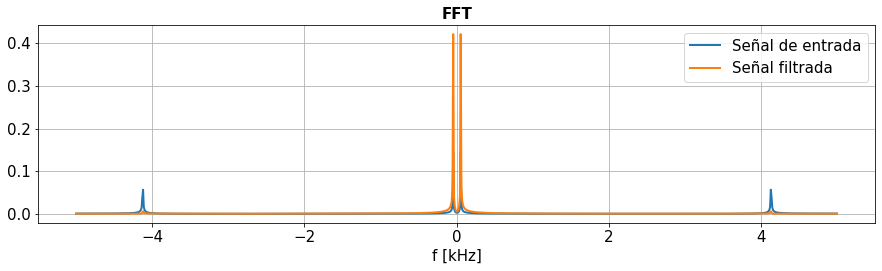

In [46]:
# The first N-1 samples are discarded due to the filter latency
warmup = len(b)-1
delay = warmup/2*Ts

x_filtered = lfilter(b, 1.0, x)

plt.figure(figsize=(15,5))
plt.plot(t/1e3,x, linewidth=2, label="Señal original")
plt.plot((t[warmup:]-delay)/1e3,x_filtered[warmup:], linewidth=2, label="Señal filtrada")
plt.legend(fontsize=14)
plt.grid(True)
plt.xlabel("t[ms]", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

X_FILTERED = fft(x_filtered, NFFT)
X_FILTERED = fftshift(X_FILTERED)


plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
plt.plot(f/1e3,1/NFFT*np.abs(X), linewidth=2, label="Señal de entrada")
plt.plot(f/1e3,1/NFFT*np.abs(X_FILTERED), linewidth=2, label="Señal filtrada")
plt.title("FFT", fontsize=15, fontweight="bold")
plt.xlabel("f [kHz]", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='best', fontsize=15)
plt.grid(True)
